In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('noccriminaldamagetablescorrection.xls',sheet_name='Table_1a',skiprows=[0,1,2], usecols = 'A,B,C,D,E,F,G,H,I,J,K,L',names=['Timing of incident','Apr 09 to Mar 10' ,'Apr 10 to Mar 11', 'Apr 11 to Mar 12', 'Apr 12 to Mar 13', 'Apr 13 to Mar 14', 'Apr 14 to Mar 15', 'Apr 15 to Mar 16', 'Apr 16 to Mar 17', 'Apr 17 to Mar 18', 'Apr 18 to Mar 19', 'Apr 19 to Mar 20' ]);
df.head()


,Timing of incident,Apr 09 to Mar 10,Apr 10 to Mar 11,Apr 11 to Mar 12,Apr 12 to Mar 13,Apr 13 to Mar 14,Apr 14 to Mar 15,Apr 15 to Mar 16,Apr 16 to Mar 17,Apr 17 to Mar 18,Apr 18 to Mar 19,Apr 19 to Mar 20
0,During the week,58.858343,58.334102,59.783533,58.743735,58.088904,57.984192,62.978968,62.108873,60.500770,66.520238,64.771099
1,At the weekend(2),41.141657,41.665898,40.216467,41.256265,41.911096,42.015808,37.021032,37.891127,39.499230,33.479762,35.228901
2,Unweighted base - number of incidents,2875.000000,2754.000000,2535.000000,1629.000000,1428.000000,1203.000000,1178.000000,1134.000000,1019.000000,1042.000000,899.000000
3,Morning/Afternoon(3),21.655065,23.189633,25.246220,26.064016,25.316246,25.561608,27.241542,28.710168,31.149995,29.259815,26.740806
4,Morning,2.988836,3.620928,6.559761,5.248894,5.551641,4.218794,6.470947,6.371353,6.719179,5.422605,6.891581


In [3]:
df['Timing of incident'].dtype

dtype('O')

In [4]:
df['Timing of incident']=df['Timing of incident'].astype('category')
df['Timing of incident'].dtype

CategoricalDtype(categories=['Afternoon', 'At the weekend(2)', 'Dark', 'Dawn/dusk',
                  'Daylight', 'During the week', 'Early evening(5)', 'Evening',
                  'Evening/Night(4)', 'Evening/night (unsure which)',
                  'Late evening(6)', 'Morning', 'Morning/Afternoon(3)',
                  'Morning/afternoon (unsure which)', 'Night',
                  'Unweighted base - number of incidents'],
                 ordered=False)

In [5]:
df.index = df.index.astype('category')

In [6]:
timingdf = pd.DataFrame.melt(df, var_name='Date', value_name = 'Chance of damage occuring', id_vars = ['Timing of incident'])
timingdf.head(20)

,Timing of incident,Date,Chance of damage occuring
0,During the week,Apr 09 to Mar 10,58.858343
1,At the weekend(2),Apr 09 to Mar 10,41.141657
2,Unweighted base - number of incidents,Apr 09 to Mar 10,2875.000000
3,Morning/Afternoon(3),Apr 09 to Mar 10,21.655065
4,Morning,Apr 09 to Mar 10,2.988836
5,Afternoon,Apr 09 to Mar 10,12.969636
6,Morning/afternoon (unsure which),Apr 09 to Mar 10,5.696592
7,Evening/Night(4),Apr 09 to Mar 10,78.344935
8,Evening,Apr 09 to Mar 10,31.872892
9,Early evening(5),Apr 09 to Mar 10,18.060806


In [7]:
Timing = ['During the week','At the weekend(2)','Morning', 'Afternoon','Morning/afternoon (unsure which)', 'Evening', 'Night', 'Evening/night (unsure which)', 'Daylight', 'Dark', 'Dawn/dusk']
timingdf['Timing of incident'] = timingdf['Timing of incident'].astype(pd.CategoricalDtype(categories = Timing,ordered = True))
timingdf['Timing of incident'].dtype

CategoricalDtype(categories=['During the week', 'At the weekend(2)', 'Morning',
                  'Afternoon', 'Morning/afternoon (unsure which)', 'Evening',
                  'Night', 'Evening/night (unsure which)', 'Daylight', 'Dark',
                  'Dawn/dusk'],
                 ordered=True)

In [8]:
timingdf.index = timingdf.index.astype('category')

timingdf.index.dtype

CategoricalDtype(categories=[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
                  ...
                  188, 189, 190, 191, 192, 193, 194, 195, 196, 197],
                 ordered=False)

In [9]:
timingdf['Date'] = timingdf['Date'].astype('category')
timingdf['Date'].dtype

CategoricalDtype(categories=['Apr 09 to Mar 10', 'Apr 10 to Mar 11', 'Apr 11 to Mar 12',
                  'Apr 12 to Mar 13', 'Apr 13 to Mar 14', 'Apr 14 to Mar 15',
                  'Apr 15 to Mar 16', 'Apr 16 to Mar 17', 'Apr 17 to Mar 18',
                  'Apr 18 to Mar 19', 'Apr 19 to Mar 20'],
                 ordered=False)

In [10]:
timingdf.dropna(inplace = True)
timingdf.head(20)

,Timing of incident,Date,Chance of damage occuring
0,During the week,Apr 09 to Mar 10,58.858343
1,At the weekend(2),Apr 09 to Mar 10,41.141657
4,Morning,Apr 09 to Mar 10,2.988836
5,Afternoon,Apr 09 to Mar 10,12.969636
6,Morning/afternoon (unsure which),Apr 09 to Mar 10,5.696592
8,Evening,Apr 09 to Mar 10,31.872892
11,Night,Apr 09 to Mar 10,26.173760
12,Evening/night (unsure which),Apr 09 to Mar 10,20.298282
14,Daylight,Apr 09 to Mar 10,25.811231
15,Dark,Apr 09 to Mar 10,70.368556


In [11]:
incidentdf = pd.DataFrame.melt(df, var_name='Date', value_name = 'Number of incidents', id_vars = ['Timing of incident'])
incidentdf.head(20)

,Timing of incident,Date,Number of incidents
0,During the week,Apr 09 to Mar 10,58.858343
1,At the weekend(2),Apr 09 to Mar 10,41.141657
2,Unweighted base - number of incidents,Apr 09 to Mar 10,2875.000000
3,Morning/Afternoon(3),Apr 09 to Mar 10,21.655065
4,Morning,Apr 09 to Mar 10,2.988836
5,Afternoon,Apr 09 to Mar 10,12.969636
6,Morning/afternoon (unsure which),Apr 09 to Mar 10,5.696592
7,Evening/Night(4),Apr 09 to Mar 10,78.344935
8,Evening,Apr 09 to Mar 10,31.872892
9,Early evening(5),Apr 09 to Mar 10,18.060806


In [12]:
noofincidents = ['Unweighted base - number of incidents']
incidentdf['Timing of incident'] = incidentdf['Timing of incident'].astype(pd.CategoricalDtype(categories = noofincidents,ordered = True))
incidentdf['Timing of incident'].dtype

CategoricalDtype(categories=['Unweighted base - number of incidents'], ordered=True)

In [13]:
incidentdf.dropna(inplace = True)
incidentdf.head(20)

,Timing of incident,Date,Number of incidents
2,Unweighted base - number of incidents,Apr 09 to Mar 10,2875.0
13,Unweighted base - number of incidents,Apr 09 to Mar 10,2879.0
17,Unweighted base - number of incidents,Apr 09 to Mar 10,2867.0
20,Unweighted base - number of incidents,Apr 10 to Mar 11,2754.0
31,Unweighted base - number of incidents,Apr 10 to Mar 11,2758.0
35,Unweighted base - number of incidents,Apr 10 to Mar 11,2750.0
38,Unweighted base - number of incidents,Apr 11 to Mar 12,2535.0
49,Unweighted base - number of incidents,Apr 11 to Mar 12,2502.0
53,Unweighted base - number of incidents,Apr 11 to Mar 12,2508.0
56,Unweighted base - number of incidents,Apr 12 to Mar 13,1629.0


In [14]:
weekdf = pd.DataFrame.melt(df, var_name='Date', value_name = 'Chance of damage occuring', id_vars = ['Timing of incident'])

In [15]:
week = ['During the week','At the weekend(2)']
weekdf['Timing of incident'] = weekdf['Timing of incident'].astype(pd.CategoricalDtype(categories = week,ordered = True))
weekdf['Timing of incident'].dtype

CategoricalDtype(categories=['During the week', 'At the weekend(2)'], ordered=True)

In [16]:
weekdf.dropna(inplace = True)
weekdf.head()

,Timing of incident,Date,Chance of damage occuring
0,During the week,Apr 09 to Mar 10,58.858343
1,At the weekend(2),Apr 09 to Mar 10,41.141657
18,During the week,Apr 10 to Mar 11,58.334102
19,At the weekend(2),Apr 10 to Mar 11,41.665898
36,During the week,Apr 11 to Mar 12,59.783533


In [17]:
weekdf = weekdf.pivot_table(
    index=['Date'], 
    columns=['Timing of incident'],
)

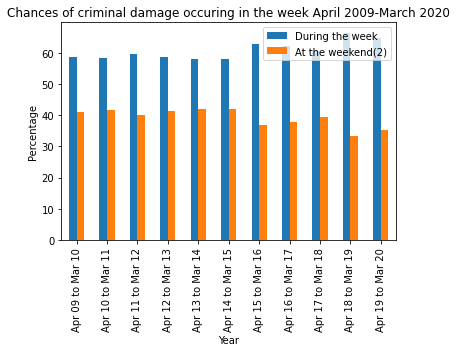

In [30]:
ax = weekdf.plot.bar()
ax.legend(labels=weekdf.columns.levels[1])
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('Chances of criminal damage occuring in the week April 2009-March 2020')
plt.savefig('criminal damage during the week.png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
daydf = pd.DataFrame.melt(df, var_name='Date', value_name = 'Chance of damage occuring', id_vars = ['Timing of incident'])

In [32]:
day = ['Daylight', 'Dark', 'Dawn/dusk']
daydf['Timing of incident'] = daydf['Timing of incident'].astype(pd.CategoricalDtype(categories = day,ordered = True))
daydf['Timing of incident'].dtype

CategoricalDtype(categories=['Daylight', 'Dark', 'Dawn/dusk'], ordered=True)

In [33]:
daydf.dropna(inplace = True)
daydf.head()

,Timing of incident,Date,Chance of damage occuring
14,Daylight,Apr 09 to Mar 10,25.811231
15,Dark,Apr 09 to Mar 10,70.368556
16,Dawn/dusk,Apr 09 to Mar 10,3.820213
32,Daylight,Apr 10 to Mar 11,27.266088
33,Dark,Apr 10 to Mar 11,68.913011


In [34]:
daydf = daydf.pivot_table(
    index=['Date'], 
    columns=['Timing of incident'],
)

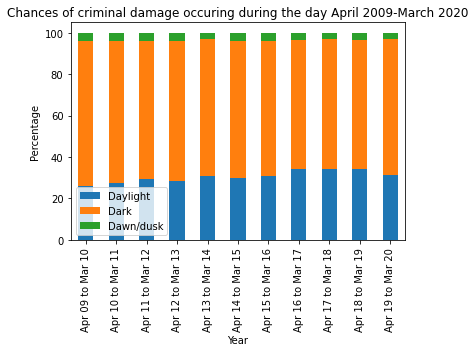

In [35]:
daydf.head()
ax = daydf.plot.bar(stacked=True)
ax.legend(labels=daydf.columns.levels[1])
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('Chances of criminal damage occuring during the day April 2009-March 2020')
plt.savefig('criminal damage day bar chart.png', dpi=300, bbox_inches='tight')
plt.show()

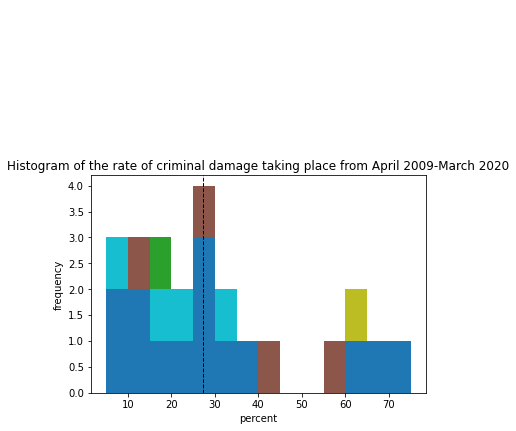

In [24]:
# Make one bin = 5 cm
bin_size = 5
start = round(timingdf['Chance of damage occuring'].min() / bin_size) * bin_size
end = timingdf['Chance of damage occuring'].max() + bin_size
bins = np.arange(start, end, bin_size)
ax = df.plot.hist(legend=None, bins=bins)
ax.set_title('Histogram of the rate of criminal damage taking place from April 2009-March 2020')
ax.set_xlabel('percent')
ax.set_ylabel('frequency')
mean = timingdf['Chance of damage occuring'].mean()
ax.axvline(mean, color='black', linestyle='dashed', linewidth=1)
ax.annotate('mean={:0.1f}'.format(mean), xy=(mean, 7),
xytext=(mean + 6, 7.3),
arrowprops=dict(facecolor='black', shrink=0.05))
plt.savefig('criminal damage histogram.png', dpi=300, bbox_inches='tight')
plt.show()

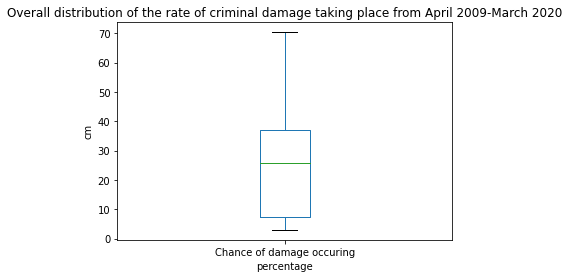

In [25]:
ax = timingdf['Chance of damage occuring'].plot.box()
ax.set_title('Overall distribution of the rate of criminal damage taking place from April 2009-March 2020')
ax.set_ylabel('cm')
ax.set_xlabel('percentage')
plt.savefig('overall criminal damage box plot', dpi=300, bbox_inches='tight')
plt.show()

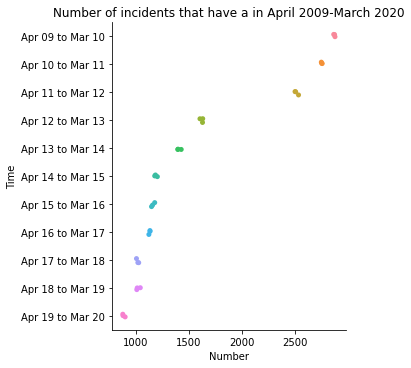

In [26]:
g = sns.catplot(x='Number of incidents', y='Date', data=incidentdf)
g.ax.set_title('Number of incidents that have a in April 2009-March 2020')
g.ax.set_ylabel('Time')
g.ax.set_xlabel('Number')
plt.savefig('number of incidents cat plots.png', dpi=300, bbox_inches='tight')
plt.show()

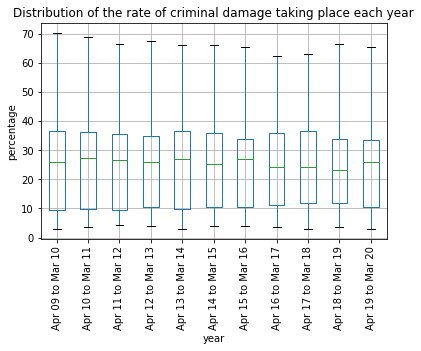

In [27]:
# Calculate the median age.
median_age = timingdf.groupby('Date').median().sort_values(
by='Chance of damage occuring', ascending=False)
# Create a new data type where platforms are ordered by median age.
ordered_platform_dtype = pd.CategoricalDtype(median_age.index, ordered=True)
# Assign new ordered categorical dtype.
timingdf['Date'] = timingdf['Date'].astype(ordered_platform_dtype)
ax = timingdf.boxplot(by='Date')
ax.set_title('Distribution of the rate of criminal damage taking place each year')
ax.figure.suptitle('')
ax.set_xlabel('year')
ax.set_ylabel('percentage')
plt.xticks(rotation=90)
plt.savefig('box plots of each year criminal damage', dpi=300, bbox_inches='tight')
plt.show()

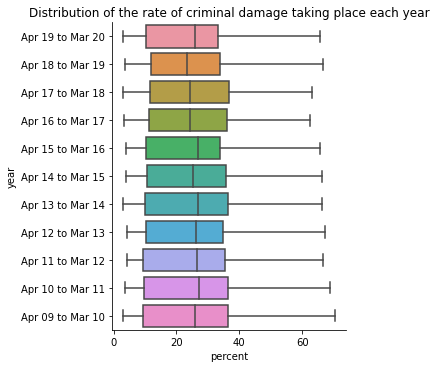

In [28]:
# Calculate the median age.
median_age = timingdf.groupby('Date').median().sort_values(
by='Date', ascending=False)
g = sns.catplot(x='Chance of damage occuring', y='Date', kind='box', data=timingdf,
order=median_age.index)
g.ax.set_title('Distribution of the rate of criminal damage taking place each year')
g.ax.set_ylabel('year')
g.ax.set_xlabel('percent')
plt.savefig('box plots of each year criminal damage2.png', dpi=300, bbox_inches='tight')
plt.show()

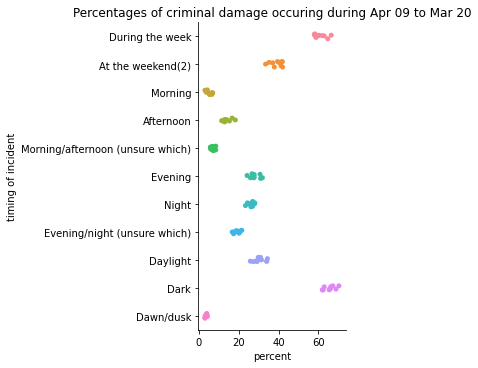

In [29]:
g = sns.catplot(x='Chance of damage occuring', y='Timing of incident', data=timingdf)
g.ax.set_title('Percentages of criminal damage occuring during Apr 09 to Mar 20')
g.ax.set_ylabel('timing of incident')
g.ax.set_xlabel('percent')
plt.savefig('cat plots of each year criminal damage.png', dpi=300, bbox_inches='tight')
plt.show()